# 📊 Análisis de videojuegos y pruebas de hipótesis para la tienda **ICE**.

In [1]:
# Importando todas las librerías necesarias
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
import math as mt
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene

### Visualizamos el contenido del dataset.

In [2]:
# Cargamos el dataset
df_games = pd.read_csv("games.csv")

# Mostramos las 5 filas del dataset
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Analizamos la información del dataset.

In [3]:
# Mostramos la iformación general del dataset
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Preparación y limpieza del dataset.

In [4]:
# Cambiamos los nombres de las columnas
New_name_columns = {"Name": "name",
                   "Platform": "platform",
                   "Year_of_Release": "year_of_release",
                   "Genre": "genre",
                   "NA_sales": "na_sales",
                   "EU_sales": "eu_sales",
                   "JP_sales": "jp_sales",
                   "Other_sales": "other_sales",
                   "Critic_Score": "critic_score",
                   "User_Score": "user_score",
                   "Rating": "rating"}

df_games.rename(columns= New_name_columns, inplace=True)

print("Detección de filas duplicadas:",df_games.duplicated().sum())

print("Detección de valores ausentes:")

df_games.isna().sum()

Detección de filas duplicadas: 0
Detección de valores ausentes:


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
# Rellenamos los valores ausentes con "Unknown" de la columna name
df_games["name"] = df_games['name'].fillna("Unknown")

# Rellenamos los valores ausentes con la mediana de la columna critic_score
critic_score_median = df_games["critic_score"].median()
df_games['critic_score'] = df_games['critic_score'].fillna(critic_score_median)
df_games['critic_score'] = df_games['critic_score'].astype("int")

# Cambiamos por Nan cualquier valor que no sea numérico en la columna user_score
df_games['user_score'] = pd.to_numeric(df_games['user_score'],
                                      errors="coerce")

# Rellenamos los valores ausentes con la media de la columna user_score
user_score_mean = df_games["user_score"].mean().round(1)
df_games['user_score'] = df_games['user_score'].fillna(user_score_mean)

# Rellenamos los valores ausentes con "Unknown" de la columna genre
df_games['genre'] = df_games['genre'].fillna("Unknown")

# Rellenamos los valores ausentes con con las siglas "UNK" que significa "Unknown" de la columna rating
df_games['rating'] = df_games['rating'].fillna("UNK")

**Limpieza y cambios en el dataset:**

En esta fase rehalizamos, se preparo el dataset

1.- Aplicamos la convención snake_case a los nombres de las columnas para una manipulación sencilla y consistente.

2.- Aplicamos los métodos duplicated e isna para detectar si el dataset contiene filas duplicadas o valores ausentes.

3.- Rellenamos los valores ausentes con el método fillna de las columnas **year_of_release**, **critic_score** utilizando mediana y para la columna **user_score** utilizamos la media.

Al momento de cambiar los valores ausentes observamos el contenido de cada columna que contenía valores ausentes por lo que al haber hacer notamos que la columna **year_of_release** contenia solo el año de la lanzamiento más no contenia mes, día o hora, por lo que opte aqui por cambiar los valores por la mediana de la columna y convertirlo a entero por la razon de que solo contenia los años. Y para el caso de de las columnas en las que cambie los valores ausentes por **Unknown o UNK** fue por la razon de que intentar adivinar el valor que representa realmente nos tomaria demasiado tiempo. 


**Cambiamos los valores ausentes por datos obtenidos a partir de la mediana, por ejemplo las columnas "year_of", "critic_score" y "user_score" ya que los datos que obtuvimos a partir de la mediana eran los que sea asemejaban a los datos vistos en el dataset.**

**En la columna "year_of_release" decidi poner 2007 como año porque al calcular el valor medio con la mediana nos dio ese valor, pero no solo fue por eso, sino porque al observar mas a fondo me di cuenta de que habia valores con su año en su nombre, pero era tan pequeña la cantidad que decia eso que opte por cambiar el valor ausente por 2007, ademas de que seria complicado buscar el año de lanzamiento de cada juego por separado y es por eso que tome esta decisión.**

**Tambien aplicmos el nombre "Unknown" a las columnas "name" y "genre", ya que en esa columna a pesar de ser solo contener 2 valores ausentes por columna, opte por cambiarlos por el nombre "unknown" para que asi nuestro DataFrame no contenga ningun valor ausente.**

**Y en la columna "rating" cambie los valores ausentes por estas siglas "UNK" ya que son las iniciales de "Unknown" ¿Por qué lo hice? Lo hice por al mirar mas a fondo las filas que contenian un valor ausente en la columna "rating" los juegos eran de diferente clasificación, asi que por eso opte por ese cambio ya que esto nos facilita el analisis a mi opinion, ademas de que los juegos al ser tan variados en clasificación seria tedioso y tardado clasificarlos, ya que son mas de 6000 filas.**

**Por ultimo convertimos las columnas a sus tipos de datos necesarios.**

# 1.3 Explicación sobre los valores ausentes

**Lo que pienso sobre el ¿Por qué están esos valores ausentes en el dataset? Es porque lo mas seguro es que el dataset se saco antes de tiempo y lo que me hace pensar esto es la columna "user_score" con el valor "tbd" que significa a determinar, es por es que surgio esta idea.**

# 1.4 Suma de las ventas en todas las regiones

In [6]:
df_games["total_sales"] = df_games['eu_sales'] + df_games['jp_sales'] + df_games['na_sales'] + df_games['other_sales']

df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.1,UNK,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.1,UNK,31.38


**Aqui calculamos el total de ventas en cada videojuego y lo almacenamos en una nueva columna.**

# 2.- Vistazo al lanzamiento de juegos en diferentes años

In [7]:
Gruop_games = df_games.groupby("year_of_release")["name"].count()

Gruop_games

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

**Por lo que vemos gracias al agrupado que hice podemos ver que si hay una diferencia significativa en los datos de cada periodo.**

# 2.1 Grafico sobre las plataformas con mayores ventas y su distribución de cada año

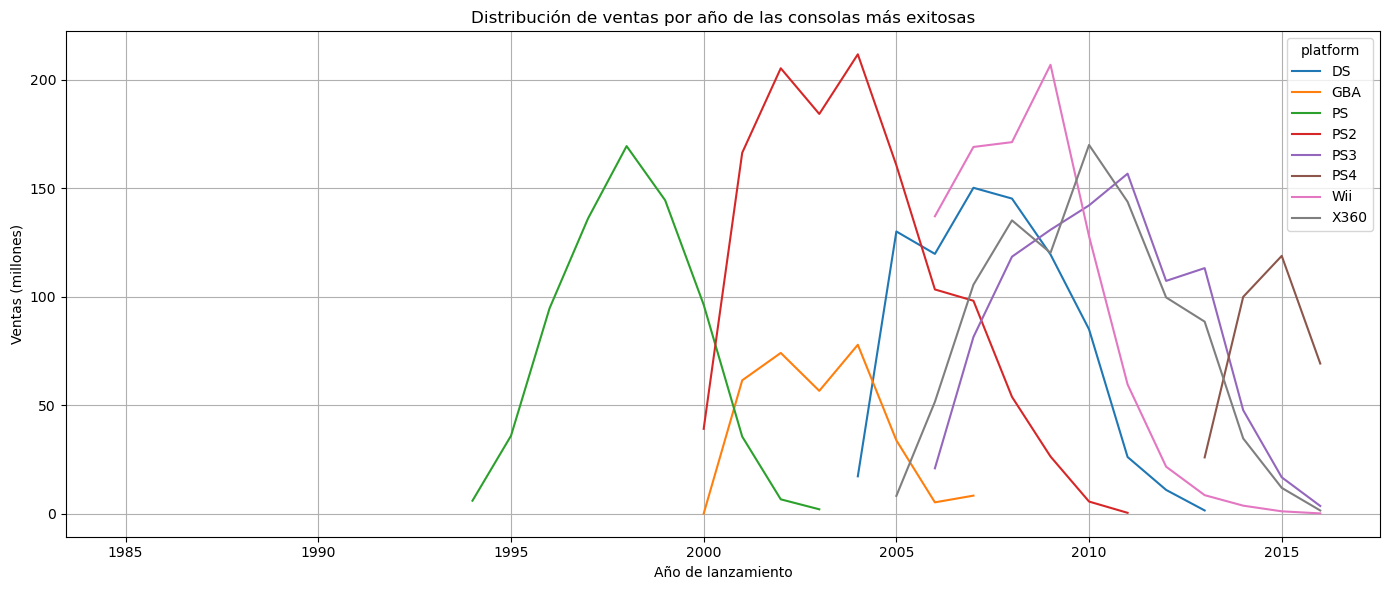

In [8]:
pivot_games = df_games.pivot_table(index=["year_of_release", "platform"],
                                  values="total_sales",
                                  aggfunc="sum")

pivot_games = pivot_games.reset_index()

ventas_totales = pivot_games.groupby('platform')['total_sales'].sum().reset_index()
top_platforms = ventas_totales[ventas_totales['total_sales'] > 300]['platform'].tolist()

df_top = pivot_games[pivot_games['platform'].isin(top_platforms)]

pivot_final = df_top.pivot_table(index="year_of_release", columns="platform", values="total_sales")

pivot_final.plot(kind="line", figsize=(14,6), title="Distribución de ventas por año de las consolas más exitosas")
plt.ylabel("Ventas (millones)")
plt.xlabel("Año de lanzamiento")
plt.grid(True)
plt.tight_layout()
plt.show()

**Gracias al grafico podemos ver el mejor momento de cada consola, asi como tambien sus inicios y finales, ademas de que podemos compararlas para ver que consola fue la que genero mayor numero de ventas.** 

# 2.2 Busqueda sobre las plataformas que solían ser populares y ahora no tienen ventas

In [9]:
vida_plataformas = df_games.groupby("platform")["year_of_release"].agg(["min", "max"]).reset_index()

vida_plataformas.columns = ["Plataformas", "Año_De_Inicio", "Año_Final"]

vida_plataformas["Duración"] = vida_plataformas['Año_Final'] - vida_plataformas['Año_De_Inicio']

vida_plataformas = vida_plataformas.sort_values(by="Año_De_Inicio")

Año_final_vida = df_games['year_of_release'].max() 

Cut_año_final_vida = Año_final_vida - 6

plataformas_muertas = vida_plataformas[vida_plataformas['Año_Final'] <= Cut_año_final_vida].copy()

plataformas_muertas["Tiempo_Entre_Lanzamientos"] = plataformas_muertas['Año_De_Inicio'].diff()

plataformas_muertas

,Plataformas,Año_De_Inicio,Año_Final,Duración,Tiempo_Entre_Lanzamientos
0,2600,1980,2007,27,NaN
11,NES,1983,1994,11,3.0
5,GB,1988,2007,19,5.0
23,SNES,1990,1999,9,2.0
8,GEN,1990,1994,4,0.0
9,GG,1992,1992,0,2.0
22,SCD,1993,1994,1,1.0
12,NG,1993,1996,3,0.0
21,SAT,1994,1999,5,1.0
15,PS,1994,2007,13,0.0


**En este analisis podemos observar una Tabla de las consolas que ya se consideran muertas, ademas de que el DataFrame original contenia un limite de años, decidi restar un total de 6 al valor maximo de años del DataFrame ya que no estabamos seguros de que las plataformas que terminaban en el año 2016, significara que ya no tenian ventas y calculamos el cuanto tardan las plataformas en aparecer y en desaparecer.**

# 2.3 Creación de un modelo en base a los datos de años anteriores para 2017

In [10]:
filtered_games = df_games[(df_games['year_of_release'] >= 2014) & (df_games['year_of_release'] <= 2016)]

top_genre = filtered_games.groupby("genre")["genre"].count().reset_index(name="count_genre")

top_sales_genre = filtered_games.groupby("genre")["total_sales"].sum().reset_index()

merge_genre = top_genre.merge(top_sales_genre, on="genre")

merge_genre = merge_genre.rename(columns={"genre": "Género",
                                         "count_genre": "Cantidad_de_juegos",
                                         "total_sales": "Ventas_totales"})

merge_genre.sort_values(by="Ventas_totales", ascending=False).reset_index(drop=True)

,Género,Cantidad_de_juegos,Ventas_totales
0,Action,619,199.36
1,Shooter,128,170.94
2,Sports,161,109.48
3,Role-Playing,221,101.44
4,Misc,113,37.55
5,Fighting,60,28.22
6,Racing,69,27.52
7,Platform,38,18.09
8,Adventure,185,17.55
9,Simulation,44,13.13


**Gracias a la tabla que hicimos podemos permitirnos construir un modelo para 2017.**

**Para empezar lo primero fue escoger una serie de años para construir nuestro modelo y tomamos los años de 2014 a 2016, para despues contar los generos que mas veces salieron en esos 3 años y despues calculamos el total de ventas para cada genero para poder ver que género genero mas ventas en estos 3 años.**

**Y despues podemos decir que para nuestro modelo de 2017, hemos visto que los géneros que generaron mas de 100 millones de los dolares en ventas se han logrado mantener en lo mas alto a lo largo de 3 años, por lo que podemos decir que esos 4 géneros se mantendran en 2017 y talvez algunos bajen y otros suban, pero se mantendran dentro los primeros lugares.**

**Y por ultimo podemos decir que los géneros que generaron menos de 100 millones en ventas, son muy variables ya que no podemos decir a ciencia cierta que géneros se mantendran en ese rango, por lo que aqui podemos decir que son bastante variables.**

# 2.4 ¿Qué plataformas son lideres en ventas? Y ¿Cuáles crecen y cuáles se reducen?

In [11]:
filtered_platforms = df_games[(df_games['year_of_release'] >= 2006) & (df_games['year_of_release'] <= 2011)]

grouop_platforms = filtered_platforms.groupby("platform")["total_sales"].sum().reset_index()

grouop_platforms.columns = ["Plataformas", "Ventas_Totales"]

list_platforms = grouop_platforms[grouop_platforms['Ventas_Totales'] > 100]["Plataformas"].tolist()

platforms = filtered_platforms[filtered_platforms['platform'].isin(list_platforms)]

pivot_platforms = platforms.pivot_table(index="year_of_release",
                                       columns="platform",
                                       values="total_sales",
                                       aggfunc="sum")

diff_platforms = pivot_platforms.diff()

pivot_platforms

platform,DS,PC,PS2,PS3,PSP,Wii,X360
year_of_release,,,,,,,
2006,119.81,2.85,103.42,20.96,55.32,137.15,51.62
2007,150.28,13.04,98.20,81.50,51.45,169.10,105.59
2008,145.31,12.42,53.90,118.52,34.55,171.32,135.26
2009,119.54,16.91,26.40,130.93,37.78,206.97,120.29
2010,85.02,24.28,5.64,142.17,35.04,127.95,170.03
2011,26.18,35.03,0.45,156.78,17.82,59.65,143.84


**Para hacer este analisis sobre las plataformas lideres en venta, escogi un rango de años donde los juegos lanzados eran mas de 1000 y empieza desde el año 2006 y termina en el año 2011.**

**Para empezar primero respondamos la siguiente pregunta ¿Qué plataformas son líderes en ventas? Las plataformas que son líderes en ventas en ese rango de años son: DS, PS3, Wii, Xbox 360 y PC (esta ultima es la más potencialmente rentable a un futuro) y esas plataformas en ese rango de años fueron potencialmente rentables.**

**Y para responder la segunda pregunta ¿Cuáles crecen y cuáles se reducen? para responder esta pregunta usamos el metodo diff en nuestra tabla anterior para comprobar si las ventas de dichas plataformas estaban creciendo o decreciendo, y como podemos ver a pesar de que las plataformas que escogimos fueron potencialmente rentables, ya para el rango de años que prevamiento habia escogido ya estaban a la baja, pero gracias al metodo diif pudimos identificar mejor las plataformas que crecieron y decrecieron.**

# 2.5 Diagrama de caja para las ventas globales de todos los juegos

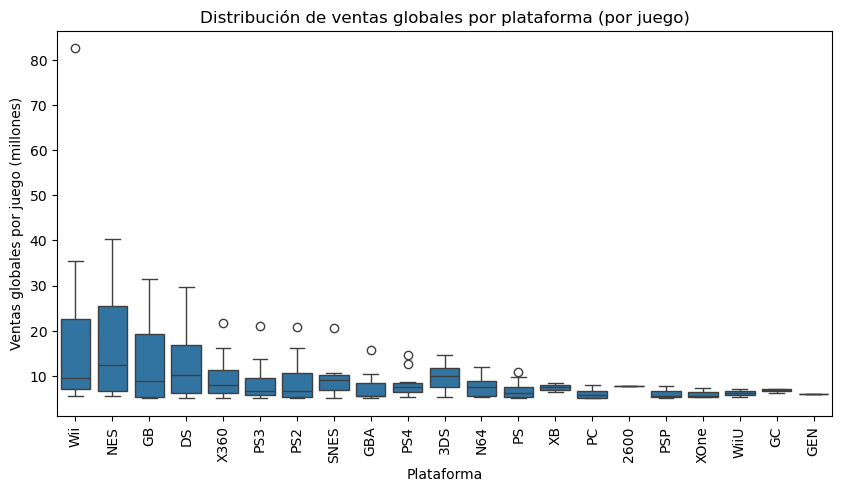

In [12]:
filtered_games = df_games[df_games['total_sales'] >= 5]


plt.figure(figsize=[10,5])
sns.boxplot(data=filtered_games,
           x="platform",
           y="total_sales")
plt.xticks(rotation=90)
plt.title("Distribución de ventas globales por plataforma (por juego)")
plt.xlabel("Plataforma")
plt.ylabel("Ventas globales por juego (millones)")
plt.show()

**Para empezar lo primero que hicimos fue filtrar juegos que tengan ventas totales o globales mayores a 5 millones ¿Por qué hicimos esto? lo hicimos para poder visualizar el diagrama de caja de mejor manera, ya que si lo imprimiamos con todas las plataformas el grafico se llenaba de demasiados puntos(valores atipicos) y no nos dejaba leer de manera visual las ventas globales para de todos los juegos y es por eso el que tome esta decisión.**

**Y respondiendo la pregunta ¿Son significativas las diferencias en las ventas? por lo que vemos en el diagrma de caja, si es demasiada la diferencia de ventas entre plataformas, pero tenemos que entender que algunas plataformas estaban en su mejor momento y otras apenas estaban saliendo al mercado, ademas de que usamos el DataFrame original sin alguna selección de rango de años .**

# 2.6 Promedio de ventas en varias plataformas

In [13]:
mean_sales = df_games.groupby("platform")["total_sales"].mean().reset_index(name="mean_sales")


mean_sales[mean_sales['mean_sales'] >= 0.50].sort_values(by="mean_sales", ascending=False).reset_index(drop=True)

,platform,mean_sales
0,GB,2.606735
1,NES,2.561735
2,GEN,1.061034
3,SNES,0.836987
4,PS4,0.801378
5,X360,0.769746
6,2600,0.729173
7,PS3,0.705973
8,Wii,0.687508
9,N64,0.685517


**Para empezar lo primero que hice fue filtrar por el promedio de ventas fuera mayor a 0.50 para asi poder leer mejor los datos sin tantas plataformas irrelevantes.**

**Y por lo que vemos en la tabla, el promedio de muchas plataformas es muy pequeño a pesar de la cantidad de venta globales que llegaron a hacer, tal caso es el de la PS2 que llego a poco más de 1200 millones en ventas globales, por lo que creo que gracias a lo visto en la tabla podemos decir que a pesar de que las plataformas hayan tenido un total de ventas globales muy altos, sus promedios dejan mucho que decir, ya que a pesar de ser tan vendida lo mas seguro es que esas consolas tuvieron demasiados juegos lanzados en esa mismas consolas por lo que su promedio se vio afectado.**

# 2.7 Reseñas de usuarios y profesionales y la correlacion entre reseñas y ventas

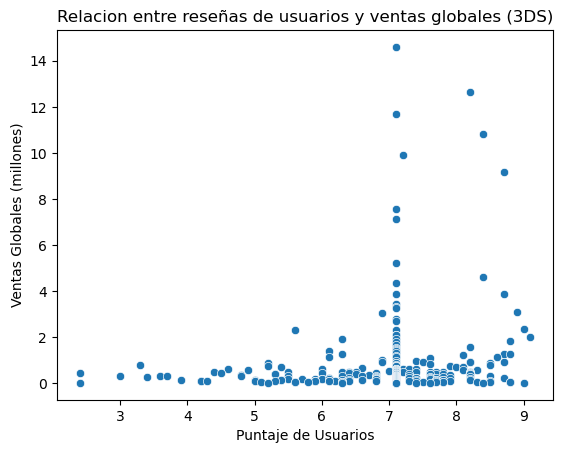

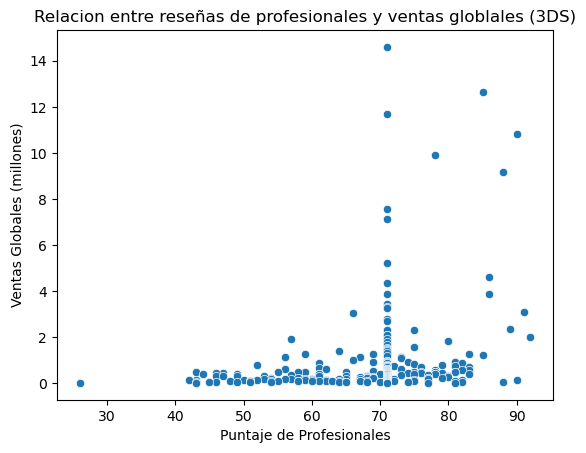

In [14]:
filtered_3DS = df_games[df_games['platform'] == "3DS"]

sns.scatterplot(data=filtered_3DS,
               x="user_score",
               y="total_sales")
plt.title("Relacion entre reseñas de usuarios y ventas globales (3DS)")
plt.xlabel("Puntaje de Usuarios")
plt.ylabel("Ventas Globales (millones)")
plt.show()

sns.scatterplot(data=filtered_3DS,
               x="critic_score",
               y="total_sales")
plt.title("Relacion entre reseñas de profesionales y ventas globlales (3DS)")
plt.xlabel("Puntaje de Profesionales")
plt.ylabel("Ventas Globales (millones)")
plt.show()

In [15]:
covarianza_user_and_sales_3DS = np.cov(filtered_3DS['user_score'], filtered_3DS["total_sales"])[0,1]                     
covarianza_critic_and_sales_3DS = np.cov(filtered_3DS['critic_score'], filtered_3DS["total_sales"])[0,1]

std_user = np.std(filtered_3DS['user_score'])
std_critic = np.std(filtered_3DS['critic_score'])
std_total = np.std(filtered_3DS['total_sales'])

correlacion_user_and_sales = covarianza_user_and_sales_3DS / (std_user * std_total)

correlacion_critic_and_sales = covarianza_critic_and_sales_3DS / (std_critic * std_total)

print("Correlación entre Usuarios y Ventas Globales:", "\n",correlacion_user_and_sales, "\n")
print("Correlación entre Critica y Ventas Globales:", "\n",correlacion_critic_and_sales)

Correlación entre Usuarios y Ventas Globales: 
 0.1324455804655265 

Correlación entre Critica y Ventas Globales: 
 0.1984836246944155


**Para empezar, en el primer grafico de "user_score entre total_sales" vemos muchos puntos dispersos, pero entre el eje x(5) y eje x(8.5) vemos mas datos acumulados entre esa zona, ademas de que el eje x(7.5) vemos que los datos empiezan a hacer una tipo de linea vertical en donde vemos en que solo un juego llego a los 14 millones de ventas globales.**

**En el segundo grafico podemos cierto parecido en la linea que se formaba por la acumulacion de los datos y lo mismo  que paso en el anterior grafico aqui se repite en el que un solo juego llego a los 14 millones de ventas, pero la diferencia de este grafico al otro es que sus datos estan menos dispersos y existe una mayor acumulacion entre el eje x(40) y el eje x(80).**

**Y despues vemos la correlacion entre las reseñas y ventas, primero empezamos por la correlacion entre las reseñas de los usarios y ventas y por lo que vimos es que su relacion es muy baja por lo que las reseñas de los usuarios no afectan a las ventas globales.**

**Y por ultimo vemos la correlacion entre las reseñas por profesionales y ventas y vemos que en este caso si existe una mayor relacion comparada a la correlacion anterior, pero aun asi la relacion sigue siendo baja, por lo que en este caso las reseñas por profesionales si afectan un poco a las ventas.**

# 2.8 Comparación de ventas en los mismos juegos en otras plataformas

In [16]:
filtered_PS2 = df_games[df_games['platform'] == "PS2"]
filtered_X360 = df_games[df_games['platform'] == "X360"]
filtered_Wii = df_games[df_games['platform'] == "Wii"]

def correlacion_user(DF):
    covarianza = np.cov(DF['user_score'], DF["total_sales"])[0,1]

    std_user = np.std(DF['user_score'])
    std_total = np.std(DF['total_sales'])

    correlacion = covarianza / (std_user * std_total)
    
    return correlacion
    
def correlacion_critic(DF):
    covarianza = np.cov(DF['critic_score'], DF["total_sales"])[0,1]

    std_critic = np.std(DF["critic_score"])
    std_total = np.std(DF["total_sales"])

    correlacion = covarianza / (std_critic * std_total)

    return correlacion

print("Correlación entre Usuarios y Ventas Globales (PS2):", correlacion_user(filtered_PS2))
print("Correlación entre Critica y Ventas Globales (PS2):", correlacion_critic(filtered_PS2),"\n")
print("Correlación entre Usuarios y Ventas Globales (X360):", correlacion_user(filtered_X360))
print("Correlación entre Critica y Ventas Globales (X360):", correlacion_critic(filtered_X360),"\n")
print("Correlación entre Usuarios y Ventas Globales (Wii):", correlacion_user(filtered_Wii))
print("Correlacion entre Critica y Ventas Globales (Wii):", correlacion_critic(filtered_Wii))

Correlación entre Usuarios y Ventas Globales (PS2): 0.21370863150529765
Correlación entre Critica y Ventas Globales (PS2): 0.34563651531765904 

Correlación entre Usuarios y Ventas Globales (X360): 0.08442804536264072
Correlación entre Critica y Ventas Globales (X360): 0.36118024655055564 

Correlación entre Usuarios y Ventas Globales (Wii): 0.08422736183621507
Correlacion entre Critica y Ventas Globales (Wii): 0.10657539055608442


**Gracias a lo que vemos en la correlacion, que lo mismo pasa aqui, pero con ligeras o grandes diferencias, asi que la conclusion ahora es que algunas plataformas les pueden afectar mas las reseñas de usuarios, pero las reseñas de las criticas son las que tienen mas posibilidad de afectar las ventas, por lo que solo una pequeña parte de las ventas globales es afectada por las reseñas.**

# 2.9 Distribución general de los juegos por género

In [17]:
group_genre = df_games.groupby("genre")["genre"].count().reset_index(name="Cantidad_de_juegos")

group_sales = df_games.groupby("genre")["total_sales"].sum().reset_index()

merge = group_genre.merge(group_sales, on="genre")

merge.columns = ["Genero", "Cantidad_de_juegos", "Ventas_totales"] 

merge["Promedio_ventas"] = merge['Ventas_totales'] / merge['Cantidad_de_juegos']

merge

,Genero,Cantidad_de_juegos,Ventas_totales,Promedio_ventas
0,Action,3369,1744.17,0.517711
1,Adventure,1303,237.59,0.182341
2,Fighting,849,447.53,0.527126
3,Misc,1750,802.51,0.458577
4,Platform,888,827.77,0.932173
5,Puzzle,580,242.57,0.418224
6,Racing,1249,728.67,0.583403
7,Role-Playing,1498,934.56,0.623872
8,Shooter,1323,1052.45,0.795503
9,Simulation,873,389.97,0.446701


**Para empezar, lo primero que hicimos fue dar un vistazo general a la distribución de los juegos por género, donde vemos que el género con mas titulos lanzados es "Action" y el segundo "Sports".**

**¿Qué se puede decir de los géneros más rentables? Podemos decir que los géneros mas rentables son los que mas titulos lanzados tienen, pero tambien géneros con una cantidad menor de titulos obteniendo una buena rentabilidad, por lo que aqui parece ser que depende de la popularidad del género.**

**¿Puedes generalizar acerca de los géneros con ventas altas y bajas? Si vemos en la tabla podemos observar la columna "Promedio_ventas" donde podemos ver que algunos géneros tienen muchos titulos lanzados pero con un promedio bajo a comparacion de géneros con menos titulos lanzados donde tienen un promedio más alto, por lo que aqui se puede decir que importa demasiado la popularidad del género.**

# 3.- Top 5 principales plataformas por región

In [18]:
region_sales = df_games.groupby("platform")[["na_sales", "eu_sales", "jp_sales"]].sum()

top_5_NA = region_sales["na_sales"].sort_values(ascending=False).head()
top_5_EU = region_sales["eu_sales"].sort_values(ascending=False).head()
top_5_JP = region_sales["jp_sales"].sort_values(ascending=False).head()

print("Top 5 plataformas de la región NA", "\n", top_5_NA,"\n")
print("Top 5 plataformas de la región EU", "\n", top_5_EU,"\n")
print("Top 5 plataformasde la region JP", "\n", top_5_JP)

Top 5 plataformas de la región NA 
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64 

Top 5 plataformas de la región EU 
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64 

Top 5 plataformasde la region JP 
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


**Para empezar vemos que en las 3 regiones las 5 principales plataformas son diferentes entre cada región, en donde la plataforma que mas ventas genera en la región NA es la Xbox360 y en las demas regiones no es asi, ya que en la región EU es la tercera con  mas ventas y en la región JP np aparece en el top 5, por lo que en este caso las ventas de una plataforma de una región a otra son muy diferentes.**

# 3.1 Cuotas de mercado de las principales plataformas por región

In [19]:
cuotas = pd.concat([top_5_NA, top_5_EU, top_5_JP], axis=1)

cuotas.columns= ["NA", "EU", "JP"]

cuotas_porcent = cuotas.div(cuotas.sum()) * 100

print("Cuotas de mercado de las principales plataformas por región (%):", "\n", cuotas_porcent)

Cuotas de mercado de las principales plataformas por región (%): 
                  NA         EU         JP
platform                                 
X360      24.499614  19.119309        NaN
PS2       23.742019  23.958451  20.720144
Wii       20.206580  18.515563        NaN
PS3       16.001383  23.322930        NaN
DS        15.550405        NaN  26.133877
PS              NaN  15.083748  20.812432
SNES            NaN        NaN  17.348655
3DS             NaN        NaN  14.984892


**Para empezar, hicimos que esta tabla se mostrara en porcentajes para poder tener una mejor comprension sobre que tanto aporta una plataforma en las distintas regiones.**

**Y lo que vemos es que algunas plataformas no me aparacen en algunas regiones, esto se debera a que algunas plataformas no fueron muy vendidads en algunas regiones, por lo que podemos decir que las cuotas de mercado de cada plataforma son muy diferentes entre las 3 regiones, y la plataforma que mas ventas logro entre todos los mercados fue la PS2.**

# 3.2 Principales géneros entre las regiones (NA, EU, JP)

In [20]:
genre = df_games.groupby("genre")[["na_sales", "eu_sales", "jp_sales"]].sum()

top_5_NA = genre['na_sales'].sort_values(ascending=False).head()
top_5_EU = genre['eu_sales'].sort_values(ascending=False).head()
top_5_JP = genre['jp_sales'].sort_values(ascending=False).head()

concat_genre = pd.concat([top_5_NA, top_5_EU, top_5_JP], axis=1)

concat_genre

,na_sales,eu_sales,jp_sales
genre,,,
Action,879.01,519.13,161.43
Sports,684.43,376.79,135.54
Shooter,592.24,317.34,NaN
Platform,445.50,NaN,130.83
Misc,407.27,212.74,108.11
Racing,NaN,236.51,NaN
Role-Playing,NaN,NaN,355.41


**Gracias a la tabla que hicimos, podemos ver que los cinco géneros principales.**

**Y podemos ver que el género Action es género con mas ventas en total y por ende es el género mas popular, seguido del género Action tenemos el género Sports que tambien una cantidad asombrosa de ventas y popularidad en todas las regiones.**

**Por lo podemos decir que tenemos muchisimas diferencias de géneros entre regiones y que en la región JP el género que mas ventas hizo fue el Role-Playing.**

# 3.3 ¿Las clasificaciones de ESRB afectan a las ventas en regiones individuales?

In [21]:
rating = pd.get_dummies(df_games["rating"])

concat = pd.concat([rating, df_games[["na_sales", "eu_sales", "jp_sales"]]], axis=1)

correlacion = concat.corr()

correlacion[["na_sales", "eu_sales", "jp_sales"]].loc[rating.columns]

,na_sales,eu_sales,jp_sales
AO,0.009475,0.007145,-0.001944
E,0.041764,0.036656,-0.050704
E10+,-0.005453,-0.007445,-0.048645
EC,-0.001940,-0.005709,-0.005499
K-A,0.009716,-0.001466,0.017745
M,0.085072,0.105022,-0.037975
RP,-0.004337,-0.003152,-0.003367
T,-0.003873,-0.000776,-0.039790
UNK,-0.080831,-0.089027,0.125024


**Como podemos ver en nuestra tabla,la mayoria de clasificaciones tienen una relacion ligeramente negativa, por ejemplo:
la clasificación M que en este caso tiene una relacion positiva pero muy baja, por lo que se puede decir que no afectan a las ventas en distintas regiones y tambien tenemos a la clasificacion UNK que en este caso tiene una relacion negativa pero muy baja, por lo queb sucede el mismo caso que el anterior ya que no afectan a as ventas en distintas regiones.**

**Por lo que podemos decir que las clasificaciones no afectan a las ventas en distintas regiones, ya que a pesar de tener una relacion positiva o negativa son muy bajas que se les puede considerar casi nula.**

# 3.4 Prueba de hipótesis para las calificaciones promedio de los usuarios de las platformas Xbox One y PC

*Hipótesis nula: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.*

*Hipótesis alternativa: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.*

**Escogí la hipótesis nula como que las calificaciones son iguales, y la alternativa como que son diferentes, porque es más fácil detectar una diferencia que probar igualdad. Así, si hay una diferencia real entre las calificaciones promedio de usuarios entre Xbox One y PC, es más probable que el análisis lo detecte. Esto nos permitiría sacar conclusiones más útiles sobre si una plataforma recibe mejores valoraciones que otra.**

**Y estableci el margen de umbral alfa como 0.05 porque este margen representa un equilibrio ya que este margen nos permite tener la confianza en los resultados sin ser demasiados estrictos ni demasiados laxos.**

In [22]:
XOne_score = df_games[df_games["platform"] == "XOne"]["user_score"]
PC_score = df_games[df_games['platform'] == "PC"]["user_score"]

alpha = 0.05

levene_stat, levene_p = levene(XOne_score, PC_score)
print("Prueba de Levene - ValorP:", levene_p)

if levene_p < alpha:
    print("Rechazamos la hipótesis nula de Levene: las varianzas NO son iguales.")
    equal_var = False
else:
    print("No podemos rechazar la hipótesis nula de Levene: las varianzas son iguales.")
    equal_var = True

results = ttest_ind(XOne_score, PC_score, equal_var=equal_var)
print("Prueba T - Valor P:", results.pvalue)    

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula (hay evidencia de diferencia en las medias).")
else:
    print("No podemos rechazar la hipótesis nula (no hay evidencia suficiente).")

Prueba de Levene - ValorP: 0.05011456835504759
No podemos rechazar la hipótesis nula de Levene: las varianzas son iguales.
Prueba T - Valor P: 3.107688668942886e-05
Rechazamos la hipótesis nula (hay evidencia de diferencia en las medias).


**Gracias a la prueba de hipótesis, concluimos que las calificaciones de usuarios entre las plataformas Xbox One y PC son muy diferentes y tal vez esto se deba a que la PC apenas estaba en pleno crecimiento.**

# 3.5 Prueba de hipótesis para las calificaciones promedio de los géneros Acción y Deportes

*Hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes 
son iguales.*

*Hipótesis alternativa: las calificaciones promedio de los usuarios para los géneros de Acción y 
Deportes son diferentes.*

**¿Por qué escogi que la hipótesis nula sea que las calificaciones son iguales y para la alternativa sean diferentes? lo escogi así, porque seguimos el mismo principio, ya que es más facil detectar las diferencias a que probar igualdad y esto nos llevara a conseguir conclusiones más utiles sobre las calificaciones promedio de los usuarios.**

**Estableci el margen de umbral alfa como 0.05, ya que este margen al ser tan equilibrado nos permite tener la confianza de los resultados sin ser demasiados estrictos ni demasiados laxos.**

In [23]:
Action_score = df_games[df_games['genre'] == "Action"]["user_score"]
Sports_score = df_games[df_games['genre'] == "Sports"]["user_score"]

alpha = 0.05

levene_stat, levene_p = levene(Action_score, Sports_score)
print("Prueba de Levene - ValorP:", levene_p)

if levene_p < alpha:
    print("Rechazamos la hipótesis nula de Levene: las varianzas NO son iguales.")
    equal_var = False
else:
    print("No podemos rechazar la hipótesis nula de Levene: las varianzas son iguales.")
    equal_var = True

results = ttest_ind(Action_score, Sports_score, equal_var=equal_var)
print("Prueba T - Valor P:", results.pvalue)    

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula (hay evidencia de diferencia en las medias).")
else:
    print("No podemos rechazar la hipótesis nula (no hay evidencia suficiente).")

Prueba de Levene - ValorP: 0.6960089589405154
No podemos rechazar la hipótesis nula de Levene: las varianzas son iguales.
Prueba T - Valor P: 0.16339359314053914
No podemos rechazar la hipótesis nula (no hay evidencia suficiente).


**Gracias a la prueba de hipótesis, hemos concluido que las calificaciones promedio de usuarios para los géneros Action y Sports "son iguales", pero talvez esto se deba que el género Action es el género con mas juegos lanzados lo cual podría provocar a que menos titulos sean probados y calificados por otro tenemos al género Sports que en este caso  tiene menos juegos lanzados y es por eso que posiblemente obtengan más calificaciones de los usuarios.**

# Conclusiones finales sobre este proyecto

**Mi conclusión es que gracias a las graficas, tablas y pruebas de hipótesis.**

**Descubrimos que a las plataformas no les afectan tanto las opiniones de los usuarios y profesionales, ademas de que descubrimos las plataformas que mayores ventas obtuvieron en todas las regiones o plataformas que solo vendieron en una región.** 

**Donde tambien ya sabemos las plataformas que ya no siguen en venta, ya que vimos la duracion de dichas plataformas.**

**Y todo esto me llevo a la conclusión de que cada plataforma tiene una región en donde más ventas obtuvo, tambien que no se ven afectadas por las opiniones de los usuarios y criticas, y talvez sea afectada por factores externos que no conocemos o no tenemos en este datasets.**

**Por lo que se puede decir que las ventas de cada plataforma se debe a la popularidad de dichas plataformas y por los juegos que llega a contener.**